LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('segmentation_data.csv',index_col=0)

In [3]:
data.head(5)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
#descriptive statistics
data.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


## Correlation Statistics

In [5]:
#the function displays the correlation between variables using pearson
data.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


## Data Visualization

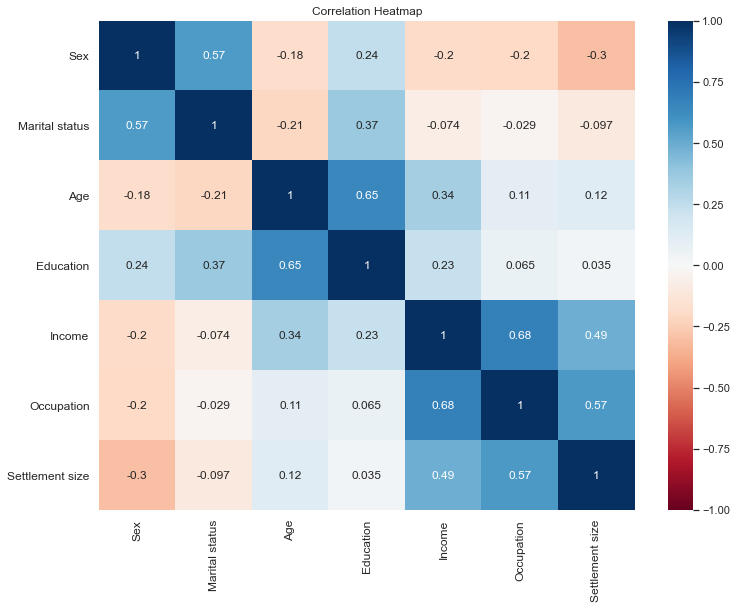

In [6]:
plt.figure(figsize=(12,9))
s = sns.heatmap(data.corr(), annot=True,cmap='RdBu',vmin=-1, vmax=1)
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation=90, fontsize=12)
plt.title('Correlation Heatmap')
plt.show()

## Visualize Raw Data

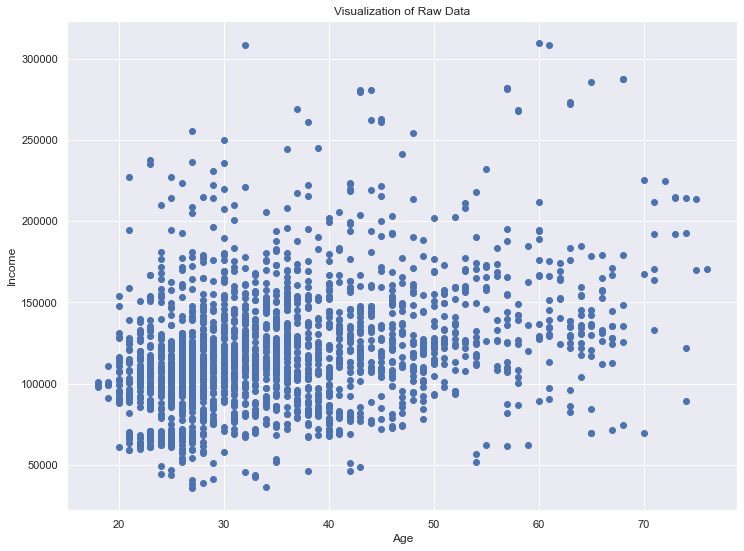

In [7]:
plt.figure(figsize=(12,9))
plt.scatter(data.iloc[:,2],data.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of Raw Data')
plt.show()

## Standardization

In [8]:
scaler = StandardScaler()

In [9]:
standardized_data = scaler.fit_transform(data)

In [10]:
standardized_data

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

## Hierarchical Clustering

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

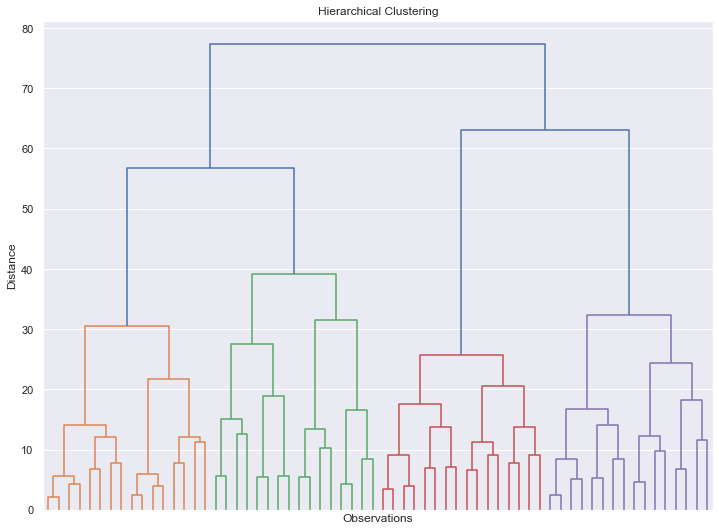

In [12]:
hie_clust = linkage(standardized_data, method = 'ward')
plt.figure(figsize=(12,9))
plt.title('Hierarchical Clustering')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hie_clust, show_leaf_counts= False, no_labels=True,truncate_mode = 'level',p=5)
plt.show()

## Kmeans Clustering

In [13]:
from sklearn.cluster import KMeans

In [14]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(standardized_data)
    wcss.append(kmeans.inertia_)

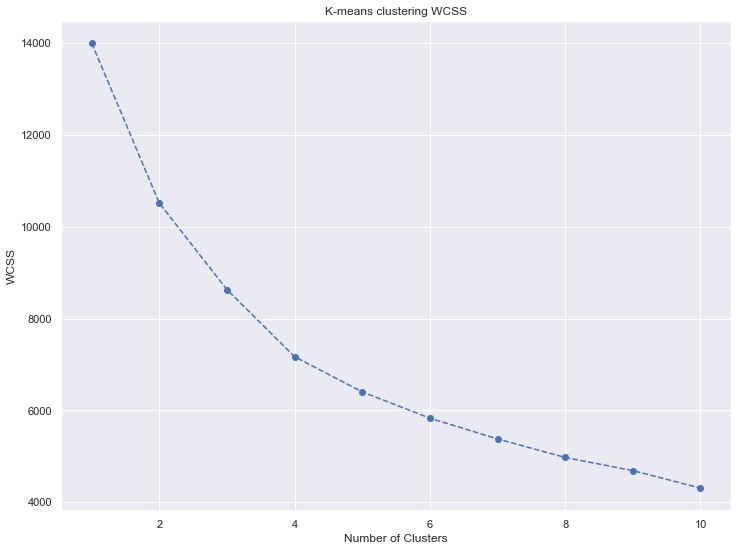

In [15]:
plt.figure(figsize=(12,9))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means clustering WCSS')
plt.show()

In [16]:
kmeans = KMeans(n_clusters=4, init='k-means++',random_state=42)

In [17]:
kmeans.fit(standardized_data)

KMeans(n_clusters=4, random_state=42)

## results

In [18]:
df_segm_kmeans = data.copy()
df_segm_kmeans['Segment Kmeans'] = kmeans.labels_

In [19]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment Kmeans']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment Kmeans,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


In [20]:
df_segm_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment Kmeans
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,0
100000002,1,1,22,1,150773,1,2,3
100000003,0,0,49,1,89210,0,0,1
100000004,0,0,45,1,171565,1,1,2
100000005,0,0,53,1,149031,1,1,2
...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1
100001997,1,1,27,1,117744,1,0,3
100001998,0,0,31,0,86400,0,0,1


In [21]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment Kmeans'].map({
    0: 'Well Off',
    1: 'fewer opportunities',
    2: 'Standard',
    3: 'Career Oriented'
})

In [22]:
df_segm_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment Kmeans,Labels
ID,,,,,,,,,
100000001,0,0,67,2,124670,1,2,0,Well Off
100000002,1,1,22,1,150773,1,2,3,Career Oriented
100000003,0,0,49,1,89210,0,0,1,fewer opportunities
100000004,0,0,45,1,171565,1,1,2,Standard
100000005,0,0,53,1,149031,1,1,2,Standard
...,...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1,fewer opportunities
100001997,1,1,27,1,117744,1,0,3,Career Oriented
100001998,0,0,31,0,86400,0,0,1,fewer opportunities


## PCA

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA()

In [25]:
pca.fit(standardized_data)

PCA()

In [26]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

In [27]:
plt.figure(figsize=(12,9))

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

Text(0, 0.5, 'Cumulative Explained Variance')

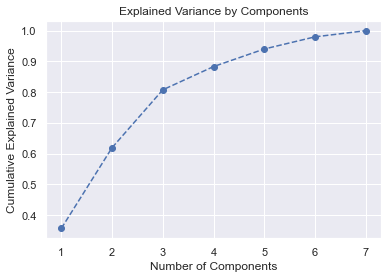

In [28]:
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [29]:
pca = PCA(n_components=3)

In [30]:
pca.fit(standardized_data)

PCA(n_components=3)

In [31]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114])

In [32]:
pca4 = PCA(n_components=4)

In [33]:
pca4.fit(standardized_data)

PCA(n_components=4)

In [34]:
pca4.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 ])

## PCA Results

In [35]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [36]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                          columns= data.columns.values,
                          index=['Component 1', 'Component 2','Component 3'])

In [37]:
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


In [38]:
pca.transform(standardized_data)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [39]:
scores_pca = pca.transform(standardized_data)

In [40]:
scores_pca

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

## Kmeans Clustering Using PCA

In [41]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scores_pca)
    wcss.append(kmeans.inertia_)

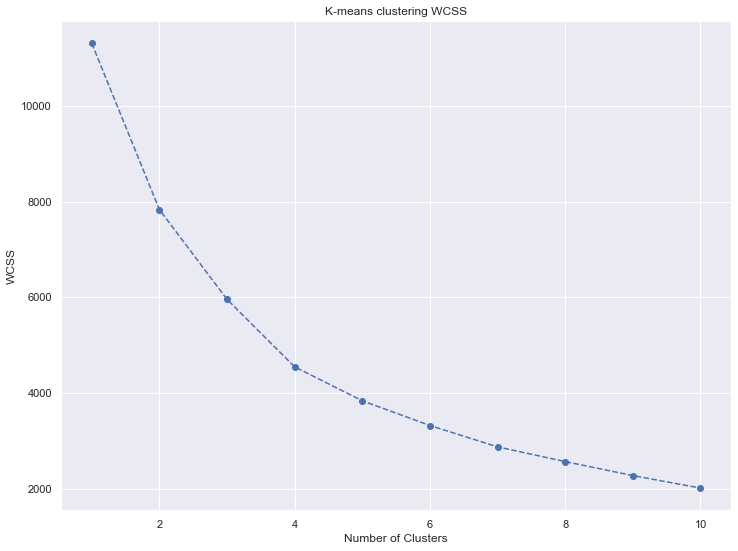

In [42]:
plt.figure(figsize=(12,9))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means clustering WCSS')
plt.show()

In [43]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)

In [44]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

## Kmeans Clustering with PCA results

In [45]:
df_segm_pca_kmeans = pd.concat([data.reset_index(drop=True), pd.DataFrame(scores_pca)],axis=1)


In [46]:
df_segm_pca_kmeans.columns.values[-3:] = ['Component 1','Component 2','Component 3']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [47]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,0
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,0
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2


## Data export saving the model

In [48]:
import pickle

In [49]:
pickle.dump(scaler, open('scaler.pickle','wb'))

In [50]:
pickle.dump(pca,open('pca.pickle','wb'))

In [51]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle','wb'))